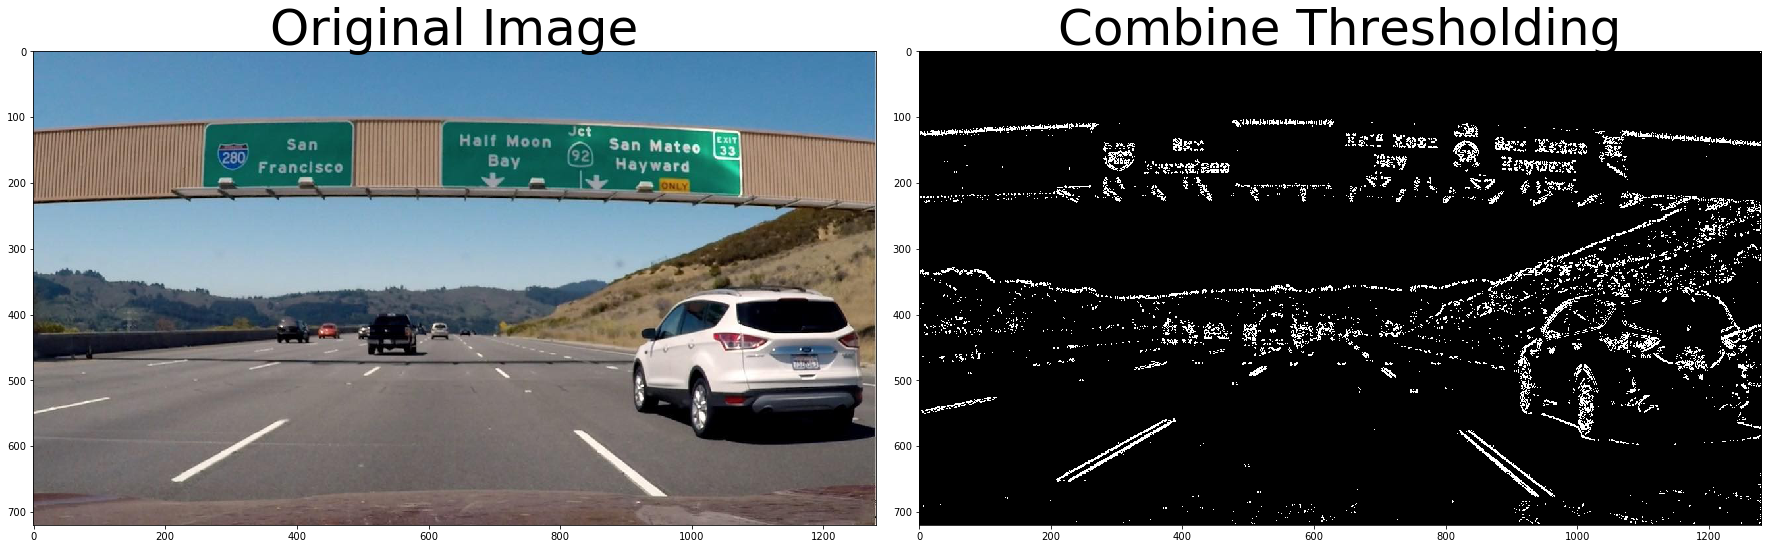

In [117]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image and grayscale it
image = mpimg.imread("C:/Users/lenovo/Documents/SDCND/Advanced-Lane-Finding/Images/signs_vehicles_xygrad.jpg")

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == "x":
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    abs_sobel = np.abs(sobel)
    sobel_scaled = np.uint8(255*abs_sobel/np.max(abs_sobel))
    grad_binary = np.zeros_like(sobel_scaled)
    grad_binary[(sobel_scaled >= thresh[0]) & (sobel_scaled <= thresh[1])] = 1
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    abs_sobelxy = np.sqrt(sobelx**2 + sobely**2)
    sobel_scaled = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    mag_binary = np.zeros_like(sobel_scaled)
    mag_binary[(sobel_scaled >= mag_thresh[0]) & (sobel_scaled <= mag_thresh[1])] = 1
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    orient = np.arctan2(abs_sobely, abs_sobelx)
    dir_binary = np.zeros_like(orient)
    dir_binary[(orient >= thresh[0]) & (orient <= thresh[1])] = 1
    return dir_binary
# Run the function
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel = 3, thresh = (10, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel = 3, thresh = (10, 100))
dir_binary = dir_threshold(image, sobel_kernel = 3, thresh = (0.8, 1.3))
mag_binary = mag_thresh(image, sobel_kernel = 3, mag_thresh = (50, 200))

combined = np.zeros_like(dir_binary)
combined[((grady == 1) & (gradx == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Combine Thresholding', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)